<a href="https://colab.research.google.com/github/Kr1szace/ImagePreProcess/blob/master/ImagePreProcessOnlineWay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [0]:
import os
import shutil

In [0]:
from PIL import Image
import glob

In [0]:
#Delete Folder
#shutil.rmtree('ImagePreProcess/Alma')

In [47]:
#Delete 'cache'
!rm -r ImagePreProcess

rm: cannot remove 'ImagePreProcess': No such file or directory


In [48]:
!git clone https://github.com/Kr1szace/ImagePreProcess.git
!ls ImagePreProcess

Cloning into 'ImagePreProcess'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 137 (delta 0), reused 134 (delta 0), pack-reused 0
Receiving objects: 100% (137/137), 48.05 MiB | 32.11 MiB/s, done.
FerfiNo  ImagePreProcessOnlineWay.ipynb  Tisztan.xlsx


In [0]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Directory Created')
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [0]:
def Image_Load(honnan):
    valamik = []
    valami=[]
    honnan='{}/*.jpg'.format(honnan)
    for filename in glob.glob(honnan): #assuming gif
        valami.append(filename)
    valamik=np.asarray(valami)

    print('Image load done')

    return valamik

In [0]:
def pre_process(img):
    img= mpimg.imread(img)
    #img=cv2.resize(img, (int(img.shape[1]/5),int(img.shape[0]/5)))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = img/255
    return img

In [0]:
def tresholded_image(im):
    for i in range(0, im.shape[0]):
        for j in range(0, im.shape[1]):
            if im[i][j]<220:
                im[i][j]=0
            else:
                im[i][j]=255
    print("tresholded function is done")
    return im
  
def find_upper_slat(im):
    megvan=0
    x=-1
    y=-1
    i=0
    j=0
    while megvan!=1 and i<im.shape[0]:
        while megvan!=1 and j<im.shape[1]:
            if im[i][j]==0:
                x=i
                y=j
                im[i][j]=150
                megvan=1
                #print('Upper slat')
                
            j+=1
        j=0
        i+=1
    #print('X: {}, Y: {}'.format(x,y))
    return x,y
  
def find_bottom_slat(im):
    megvan=0
    x=-1
    y=-1
    i=im.shape[0]-1
    j=0
    while megvan!=1 and i>=0:
        while megvan!=1 and j<im.shape[1]:
            if im[i][j]==0:
                x=i
                y=j
                im[i][j]=150
                megvan=1
                #print('Bottom slat') 
            j+=1
        j=0
        i-=1
    #print('X: {}, Y: {}'.format(x,y))
    return x,y
  
def find_left_slat(im):
    megvan=0
    x=-1
    y=-1
    i=0
    j=0
    while megvan!=1 and i<im.shape[1]:
        while megvan!=1 and j<im.shape[0]:
            if im[j][i]==0:
                x=i
                y=j
                im[j][i]=150
                megvan=1
                #print('Left slat')
                
            j+=1
        j=0
        i+=1
    #print('X: {}, Y: {}'.format(x,y))
    return x,y
  
def find_right_slat(im):
    megvan=0
    x=-1
    y=-1
    i=im.shape[1]-1
    j=0
    while megvan!=1 and i>=0:
        while megvan!=1 and j<im.shape[0]:
            if im[j][i]==0:
                x=i
                y=j
                im[j][i]=150
                megvan=1
                #print('Right slat') 
            j+=1
        j=0
        i-=1
    #print('X: {}, Y: {}'.format(x,y))
    return x,y
  
def coordinates_of_frame(im):
    upper_x, upper_y=find_upper_slat(im)
    bottom_x, bottom_y=find_bottom_slat(im)
    left_x, left_y=find_left_slat(im)
    right_x, right_y=find_right_slat(im)
    return upper_x, upper_y, bottom_x, bottom_y, left_x, left_y, right_x, right_y
  
def frame_of_text(im,upper, bottom, left, right):
    
    a=((bottom)-(upper-1))
    b=((right)-(left-1))
    image=[[0] * b for i in range(a)]
    
    
    if upper==0:
        upper=-1
    elif upper>0:
        upper-=1
      
    if bottom==im.shape[0]-1:
        bottom=-1
    elif bottom<im.shape[0]-1:
        bottom+=1
    
    
    if left==0:
        left=-1
    elif left>0:
        left-=1
 
    if right==im.shape[1]-1:
        right=-1
    elif right<im.shape[1]-1:
        right+=1
    
    image=np.asarray(image)
    print("shape",image.shape)
    

            
    
    for h in range(0,image.shape[0]):
         for w in range(0, image.shape[1]):
                if upper!=-1 and left!=-1:
                    valami=im[(upper+1+h)][(left+1+w)]
                    image[h][w]=valami
                elif upper!=-1 and left==-1:
                    valami=im[(upper+1+h)][(left+w)]
                    image[h][w]=valami
                elif upper==-1 and left!=-1:
                    valami=im[(upper+h)][(left+1+w)]
                    image[h][w]=valami
                #mindkettő minusz egy
                else:
                    valami=im[(upper+h)][(left+w)]
                    image[h][w]=valami
                    
                    
                    
                
            
    for i in range(0,im.shape[1]):
        if upper!=-1:
            im[upper, i]=0
        if bottom!=-1:
            im[bottom, i]=0
    for j in range(0,im.shape[0]):
        if left!=-1:
            im[j, left]=0
        if right!=-1:
            im[j, right]=0    
  
            
    return image
  
def cutted_image(img_name, img_to):
    img_treshold=tresholded_image(pre_process(img_name))
    img = pre_process(img_name)
    coordinates=coordinates_of_frame(img_treshold)
    return_image=frame_of_text(img, coordinates[0], coordinates[2], coordinates[4], coordinates[6])
    #plt.imshow(return_image)
    print(img_to+'/'+ img_name.split('/')[-1])
    cv2.imwrite(img_to+'/'+img_name.split('/')[-1], return_image)
    
def Cutted_images(honnan, hova):
    createFolder(hova)
    images=Image_Load(honnan)
    for image in images:
        cutted_image(image, hova)
    print('Cutted_images Done')  

In [68]:
!ls ImagePreProcess/Frame/Ferfi

111.jpg  11.jpg  24.jpg


In [72]:
!git --help


usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [78]:
!git add --help

GIT-ADD(1)                        Git Manual                        GIT-ADD(1)

NNAAMMEE
       git-add - Add file contents to the index

SSYYNNOOPPSSIISS
       _g_i_t _a_d_d [--verbose | -v] [--dry-run | -n] [--force | -f] [--interactive | -i] [--patch | -p]
                 [--edit | -e] [--[no-]all | --[no-]ignore-removal | [--update | -u]]
                 [--intent-to-add | -N] [--refresh] [--ignore-errors] [--ignore-missing] [--renormalize]
                 [--chmod=(+|-)x] [--] [<pathspec>...]

DDEESSCCRRIIPPTTIIOONN
       This command updates the index using the current content found in the
       working tree, to prepare the content staged for the next commit. It
       typically adds the current content of existing paths as a whole, but
       with some options it can also be used to add content with only part of
       the changes made to the working tree files applied, or remove paths
       that do not exist in the working tree anymore.

    

In [88]:
!ls ImagePreProcess
!git add ImagePreProcess --update

FerfiNo  Frame	ImagePreProcessOnlineWay.ipynb	Tisztan.xlsx
fatal: not a git repository (or any of the parent directories): .git


tresholded function is done


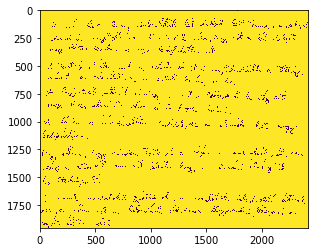

In [67]:
im=tresholded_image(np.array(Image.open('ImagePreProcess/Frame/Ferfi/111.jpg')))
plt.imshow(im)

In [54]:
pip install gitpython

In [55]:
Cutted_images('ImagePreProcess/FerfiNo/Ferfi', 'ImagePreProcess/Frame/Ferfi')
#Cutted_images('ImagePreProcess/FerfiNo/No', 'ImagePreProcess/Frame/No')

Directory Created
Image load done
tresholded function is done
shape (1955, 2412)
ImagePreProcess/Frame/Ferfi/111.jpg
tresholded function is done
shape (2514, 2352)
ImagePreProcess/Frame/Ferfi/24.jpg
tresholded function is done
shape (2637, 2338)
ImagePreProcess/Frame/Ferfi/11.jpg


KeyboardInterrupt: ignored

In [39]:
!git commit 

ImagePreProcess/Frame/Ferfi/
Some error occured while pushing the code


In [58]:
!ls ImagePreProcess/Frame/Ferfi

111.jpg  11.jpg  24.jpg


In [110]:
!git push https://github.com/Kr1szace/ImagePreProcess.git -u origin –all 

fatal: not a git repository (or any of the parent directories): .git


In [103]:
!git fetch https://github.com/Kr1szace/ImagePreProcess.git

fatal: not a git repository (or any of the parent directories): .git


In [104]:
!git add 'valami.txt'

fatal: not a git repository (or any of the parent directories): .git


In [97]:
!git https://github.com/Kr1szace/ImagePreProcess.git status

git: 'https://github.com/Kr1szace/ImagePreProcess.git' is not a git command. See 'git --help'.


In [98]:
!git --help

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [93]:
!cd ../
!git add *
!git commit -m "Enter commit message here"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [84]:
!pip install git
from git import Repo
repo = Repo('ImagePreProcess/Frame/Ferfi')  # if repo is CWD just do '.'

repo.index.add(['valami.txt'])
repo.index.commit('Cutted Images')
origin = repo.remote('origin')
origin.push()

  ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


ModuleNotFoundError: ignored